In [1]:
import typing
import datetime

import rich
import seaborn

from twon_lss.utility import Noise, Decay

In [2]:
DATETIME: datetime.datetime = datetime.datetime.now()
TIMEDELTA: datetime.timedelta = datetime.timedelta(days=3)

NUM_SAMPLES: int = 1_000_000

In [3]:
observations: typing.List[datetime.datetime] = [
    DATETIME - (TIMEDELTA * i / NUM_SAMPLES) for i in reversed(range(NUM_SAMPLES))
]
rich.print(observations[:5])

[
    datetime.datetime(2025, 6, 22, 13, 8, 8, 395259),
    datetime.datetime(2025, 6, 22, 13, 8, 8, 654459),
    datetime.datetime(2025, 6, 22, 13, 8, 8, 913659),
    datetime.datetime(2025, 6, 22, 13, 8, 9, 172859),
    datetime.datetime(2025, 6, 22, 13, 8, 9, 432059)
]

In [ ]:
noise: Noise = Noise(low=0.6, high=1.4)
decay: Decay = Decay(minimum=0.2, timedelta=TIMEDELTA)

<Axes: ylabel='Density'>

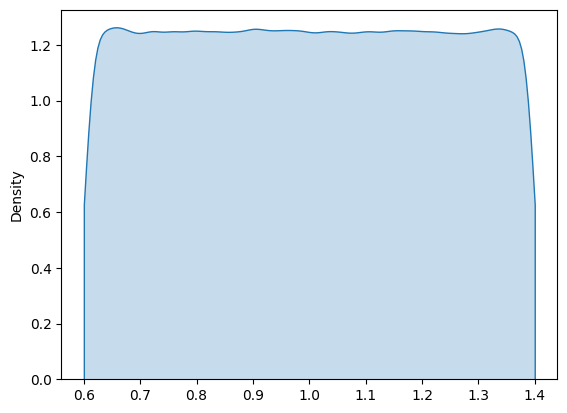

In [5]:
seaborn.kdeplot(
    noise.draw_samples(NUM_SAMPLES),
    fill=True,
    clip=(noise.low, noise.high),
)

<Axes: >

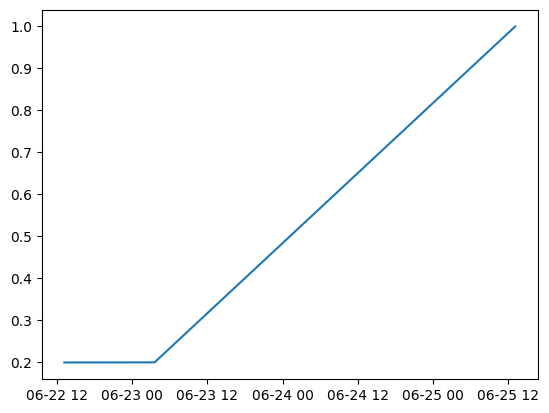

In [6]:
seaborn.lineplot(
    x=observations,
    y=[decay(obs, DATETIME) for obs in observations],
)